###### Thanks for joining us!

This is a sample python notebook where we expect you'll be pending a lot of your time. Notebooks are great because not only can you [write notes in markdown](https://guides.github.com/features/mastering-markdown/), and [math in $\LaTeX$](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes), but you can write code too! Check this out:

In [1]:
print("Hello World")

Hello World


Our lab studies material deformation at a mesoscale. Think of a spring (TODO)

In discrete dislocation dynamics, we typically think of these of these lattice mismatches (or dislocations) [as similar to a graph](https://www.youtube.com/watch?v=ZHqQDA3be-k). This is a pretty fun area of math, I'm sad all the examples I found online were pretty boring. Notably, we DO care where the vertices (we call them nodes) are, and DO care about additional physical information assosiated with the edges (or segments as we refer to them). However, treating DDD as a graph problem makes it easier for use when programming.

## Learning goals of 1st week:

 - Learn basic material science intuition for what our lab does
 - Learn some basic python to get up to speed
 - Learn some discrete math, graph theory, and algorithms
 - Learn some basic linear algebra

## First deliverable

We have a python library backed by a more powerful C++ framework. Our current method for visualizing our dislocations systems, is to export our simulations and open them in paraview. Jupyter notebooks let us make plots right here! For example:

In [2]:
import numpy as np
x = np.arange(-10, 11)
for i, val in enumerate(x):
    x[i] = val * val
x

array([100,  81,  64,  49,  36,  25,  16,   9,   4,   1,   0,   1,   4,
         9,  16,  25,  36,  49,  64,  81, 100])

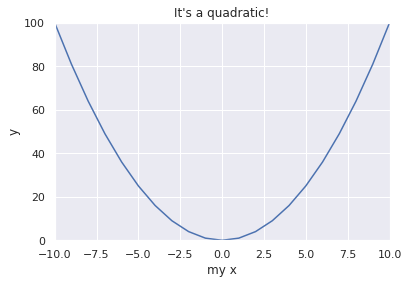

In [3]:
# Package for plotting in python
import matplotlib.pyplot as plt

# Seaborn makes matplotlib charts prettier.
import seaborn as sns
sns.set()

# Numpy is a great package for doing math.
import numpy as np

# You probably remember quadratic equations
# y = x^2
# We're just going to calculate and plot that
x = np.arange(-10, 11) # -10, -9, .. 10
y = x**2               # 100, 81, .. 100

# We can now set up our plotting guidlines
plt.title("It's a quadratic!")
plt.xlim((-10, 10))
plt.ylim((0, 100))
plt.xlabel("my x")
plt.ylabel("y")

# And finally we plot
plt.plot(x, y)
plt.show()

We would like a way to plot our dislocation networks right in jupyter. Currently this functionality does not exist. Documentation of our library can be found [here](https://dmadisetti.github.io/pd3/api-py-pd3--python--core--Study/). An example of using our library is as follows:

In [4]:
# pd3 is our library!
# it stands for: parallel discrete partial dislocation + precipitate dynamics 
# but really, it's just fun to say
import pd3
from pd3.proto.study_pb2 import IMMOBILE

# A "normal" vector is a vector that is length 1 from the origin (0,0).
# This makes any vector "normal"
def normalize(a, b, c):
    """Creates a unit vector from a, b, c"""
    vector = np.array([a, b, c])
    return vector / np.linalg.norm(vector)

# This is the 'plane normal'. A plane cuts through 3D space, and the normal, is perpendicular to all vectors on the plane. That is normal \dot vector = 0
normal = normalize(1, 1, 1)

# These are directions on the plane. We can chose any 2 vectors to be our 'basis', but these are nice
# and relevant to crystallography in FCC materials.
# Note y_dir dot x_dir = 0, but also
# x_dir dot normal = y_dir dot normal = 0!
y_direction = normalize(-1, 1, 0)
x_direction = normalize(1, 1, -2)

# Burger's direction is a means of measuring the type and magnitude of the lattice mismatches.
# This will come up much more. It is physically derived from something called a burger's circut
# which I can touch on more later.
burgers = pd3.Burgers((1, 0, -1))

# We're going to make a parabola shape just like the previous example.
# But since we're in 3D, we need to handle the equation a little differently.
def in_plane_quadratic(x):
    y = x**2
    return x * x_direction + y * y_direction

# All pd3 usage starts off with creating a study.
example = pd3.Study()

# Start off our parabola
# Here we make a node, or vertex.
# We'll later "connect" vertices together to make an edge or segment.
# We note that the node is "IMMOBILE", which means it can't move during
# our simulations.
start = example.create_node(
    in_plane_quadratic(-4), # This is the position in space
    IMMOBILE # This is the type of node, which means it's fixed in space.
)
old_node = start

# Create a node for each step, and connect each next
# step to the previous step.
for x in range(-3, 7):
    new_node = example.create_node(
        in_plane_quadratic(x), # The position in space changes with x
    )
    # We make the segment by connecting 2 nodes.
    example.connect(old_node, new_node, burgers)
    # We set the old_node to new node for the next loop.
    old_node = new_node

# Add the end to our parabola!
end = example.create_node(
    in_plane_quadratic(6), # The other side of the quadratic
    IMMOBILE # This end is also fixed.
)
example.connect(old_node, end, burgers)


True

In [5]:
# We're going to make a parabola shape just like the previous example.
# But since we're in 3D, we need to handle the equation a little differently.
def fancy_quadratic(x):
    y = -3*x**2 + 200*x + 2800
#     y = 1*x**2 + 10*x + 10
#     y = -8*x**4 + 3908*x + 90000 #by changing this, you change the shape of the graph
#     y = -9*x**7 + 99*x + 900
#     y = -2*x**2 + 400*x + 3000
#     y = -2*x**2 + 500*x + 800
#     y = -3*x**1 + 300*x + 5000
    return x * x_direction + y * y_direction

# burgers = pd3.Burgers((-1, 1, 0))
# alt_burgers = pd3.Burgers((1, 0, -1))
alt_burgers = pd3.Burgers((1, -1, 0))

# Start off our parabola
# Here we make a node, or vertex.
# We'll later "connect" vertices together to make an edge or segment.
# We note that the node is "IMMOBILE", which means it can't move during
# our simulations.
start = example.create_node(
    fancy_quadratic(-4), # This is the position in space
    IMMOBILE # This is the type of node, which means it's fixed in space.
)
old_node = start

# Create a node for each step, and connect each next
# step to the previous step.
for x in range(-4, 6):
    new_node = example.create_node(
        fancy_quadratic(x), # The position in space changes with x
    )
    # We make the segment by connecting 2 nodes.
    example.connect(old_node, new_node, alt_burgers)
    # We set the old_node to new node for the next loop.
    old_node = new_node

# Add the end to our parabola!
end = example.create_node(
    fancy_quadratic(6), # The other side of the quadratic
    IMMOBILE # This end is also fixed.
)
example.connect(old_node, end, burgers)


True

In [6]:
# Convert our system into a graph for plotting
graph = example.export_protobuf()

## Note

You'll notice that the points are in 3d, while plots can only really be done in 2d. So we need to prescribe the x, y axis in 3D space to come up with a 3D plot. One you feel comfortable with the content your first task will be to fill out the following function.

In [9]:
# Dylan: Check this out! Give it a run. Click and drag as well

import ipyvolume as ipv
import numpy as np
s = 1/2**0.5
# 4 vertices for the tetrahedron
x = np.array([1.,  -1, 0,  0])
y = np.array([0,   0, 1., -1])
z = np.array([-s, -s, s,  s])
# and 4 surfaces (triangles), where the number refer to the vertex index
triangles = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1,3,2)]
ipv.figure()
# we draw the tetrahedron
mesh = ipv.pylab.plot(x, y, z)
# and also mark the vertices
ipv.pylab.style.use("fivethirtyeight")
ipv.scatter(x, y, z, marker='sphere')
ipv.xyzlim(-2, 2)
ipv.show()

!
NEW BRANCH
38207984 None
NEW BRANCH
47517584 47517584
Not Visited: {58285728, 45736480, 50523040, 56537008, 47186736, 45736624, 47253680, 45547568, 45736768, 46072640, 56787136, 42590144, 56875968, 47253824, 47186880, 46072784, 46680784, 46680928, 34111328, 48673504, 45547760, 48673648}
NEW BRANCH
56875968 47517584
NEW BRANCH
42590144 38207984
NEW BRANCH
56875968 56875968
Not Visited: {58285728, 45736480, 50523040, 56537008, 47186736, 45736624, 47253680, 45547568, 45736768, 46072640, 56787136, 47253824, 47186880, 46072784, 46680784, 46680928, 34111328, 48673504, 45547760, 48673648}
NEW BRANCH
47253680 56875968
NEW BRANCH
42590144 42590144
Not Visited: {58285728, 45736480, 50523040, 56537008, 47186736, 45736624, 45547568, 45736768, 46072640, 56787136, 47253824, 47186880, 46072784, 46680784, 46680928, 34111328, 48673504, 45547760, 48673648}
NEW BRANCH
47186880 42590144
NEW BRANCH
48673504 47253680
NEW BRANCH
47186880 47186880
Not Visited: {58285728, 45736480, 50523040, 56537008, 471867

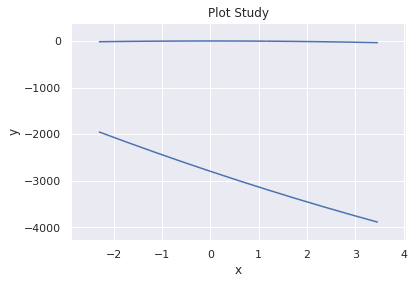

In [33]:
#plot study using dfs

import pd3
from pd3.proto.study_pb2 import IMMOBILE
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mcimport 
import matplotlib.cm as cm
import pylab as pl


def plot_study(study, x_axis=(1, 0, 0), y_axis=(0, 1, 0), timestep = 0):
    """! \brief Plots the dislocation system at the given timestep.

    Plots a given dislocation system with orthogonal axes.
    \param study Self instance.
    \param x_axis The x axis to project the system on.
    \param y_axis The y axis to projec the system on.
    \param timestep The timestep to plot.
    """
    # Ensure x_axis, y_axis are normalized
    x_axis = np.array(x_axis)
    x_axis = x_axis / np.linalg.norm(x_axis)
    y_axis = np.array(y_axis)
    y_axis = y_axis / np.linalg.norm(y_axis)
    
    # https://numpy.org/doc/stable/
    if x_axis.dot(y_axis) != 0:
        raise pd3.Pd3Exception("Provided axes are not normal.")

    graph = study.export_protobuf()

    # Here's an example of how to break up our graph to get the edges and vertices.
    vertices = graph.state[timestep].nodes
    edges = graph.state[timestep].links
    g = {}
    not_visited = set()
    visited = set()
    
    
    for edge in edges:
        not_visited.add(edge.leading)
        not_visited.add(edge.trailing)
        leading_neighbors = g.get(edge.leading, [])
        leading_neighbors.append(edge.trailing)
        trailing_neighbors = g.get(edge.trailing, [])
        trailing_neighbors.append(edge.leading)
        g[edge.leading] = leading_neighbors
        g[edge.trailing] = trailing_neighbors

    node_vectors = {}
    for node_id in vertices:
        node = vertices[node_id]
        node_3d = np.array([node.x, node.y, node.z])
        node_x = x_axis.dot(node_3d)
        node_y = y_axis.dot(node_3d)
        node_vectors[node_id] = (node_x, node_y)
        
    
    lines = []
    def dfs(current, previous, line):
        # Dylan: I moved all the definitions up here
        neighbors = g[current]
        here = node_vectors[current]
        branch = line
        branch.append(here)
        # If this is our firt visit, then we should record this line.
        # Otherwise, we're in a loop!
        first_visit = current not in visited
        # This is the end of a dislocation line because:
        #       1) there's only 1 connection
        #       2) and that cpnnection is previous
        end_of_line = (len(neighbors) == 1 and neighbors[0] == previous)

        # Even if it's the end of the line, we try to add it to previous.
        visited.add(current)
        if current in not_visited:
            not_visited.remove(current)

        # Now we check to see if we should stop and record the line.
        if not first_visit or end_of_line:
            if line:
                lines.append(branch)
            return

        for node in neighbors: #this starts the new branches?
            print ("NEW BRANCH")
            print(node, previous)
            if node != previous:
                dfs(node, current, branch, 0)
                branch = [node_vectors[current]]
            print("Not Visited: " + str(not_visited))
    
    while len(not_visited) > 0:
        start_node = not_visited.pop()
        dfs(start_node, None, [], 0)

    print(len(lines))
#    #using line collection
    lc = mc.LineCollection(lines)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
#     ax.quiver(node_x, node_y, node_x, node_y)
    plt.title("Plot Study")
    plt.xlabel("x")
    plt.ylabel("y")
    
#     plt.plot(x_data, y_data,'o')

x = normalize(1,0,0)
y = normalize(0,1,0)
    
#study = pd3.Study()
#start = study.create_node((-2,3,-1), IMMOBILE)
# TODO: This should make a pretty similar graph to the standard quadratic graph above.
plot_study(example, (1,1,0), (1,-1,0))


#Start dfs at node zero

# Extended goals

# - Try and plot different colors based on BV

# - Fix the DFS approach
# - Try to get 3D working



In [ ]:
# Here is what all the nodes and segments look like in the graph.
# state = graph.state[0]
# state.nodes

arr = [1, 2, 3, 4, 5]

hashmap = {
    "Hello!": "World",
    "crazy": {
        "Woah": "this is wild"
    },
    0: "Wow!",
    1: 123,
}

graph.state[0].nodes[25848368]